# Feature Engineering and Importantance

Data does not always lead directly or easily to insights and information. Poor data cannot lead to positive outcomes. It is apparent at this point how vital data preprocessing is. Through data preparation, potentially valuable data can be extracted from raw data. 

Having a solid understanding of feature engineering is essential for making effective use of machine learning tools. Since algorithms can't function with data that hasn't been properly processed and wrangled into the appropriate format, raw data is hardly used to build any Machine Learning models. Features are characteristics or attributes obtained from raw data. The three main steps needed to manage data features. The list of them is as follows:

1. Feature extraction and engineering
2. Feature scaling
3. Feature selection


![Feature Engineering Pipeline](https://drive.google.com/uc?id=129X0Ir0huQx1vP7CH9GPVSTa3cjKoAyQ)


> "Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data." - *Dr. Jason Brownlee*

***

**Features:** *These are special representations that are generated from the raw data through the feature engineering process.*

***

## Why Feature Engineering?

- Better data representation
- Better performing models



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
pip install missingno

In [ ]:
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

# Read the dataset

In [ ]:
def load_application_train():
    data = pd.read_csv("/content/my_data/application_train.csv")
    return data

In [ ]:
def load():
    data = pd.read_csv("/content/my_data/titanic.csv")
    return data

In [10]:
df = load()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [ ]:
df = load_application_train()
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.500,24700.500,351000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019,-9461.000,-637.000,-3648.000,-2120.000,NaN,1.000,1.000,0.000,1.000,1.000,0.000,Laborers,1.000,2.000,2.000,WEDNESDAY,10.000,0.000,0.000,0.000,0.000,0.000,0.000,Business Entity Type 3,0.083,0.263,0.139,0.025,0.037,0.972,0.619,0.014,0.000,0.069,0.083,0.125,0.037,0.020,0.019,0.000,0.000,0.025,0.038,0.972,0.634,0.014,0.000,0.069,0.083,0.125,0.038,0.022,0.020,0.000,0.000,0.025,0.037,0.972,0.624,0.014,0.000,0.069,0.083,0.125,0.037,0.021,0.019,0.000,0.000,reg oper account,block of flats,0.015,"Stone, brick",No,2.000,2.000,2.000,2.000,-1134.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.500,35698.500,1129500.000,Family,State servant,Higher education,Married,House / apartment,0.004,-16765.000,-1188.000,-1186.000,-291.000,NaN,1.000,1.000,0.000,1.000,1.000,0.000,Core staff,2.000,1.000,1.000,MONDAY,11.000,0.000,0.000,0.000,0.000,0.000,0.000,School,0.311,0.622,NaN,0.096,0.053,0.985,0.796,0.060,0.080,0.035,0.292,0.333,0.013,0.077,0.055,0.004,0.010,0.092,0.054,0.985,0.804,0.050,0.081,0.035,0.292,0.333,0.013,0.079,0.055,0.000,0.000,0.097,0.053,0.985,0.799,0.061,0.080,0.035,0.292,0.333,0.013,0.079,0.056,0.004,0.010,reg oper account,block of flats,0.071,Block,No,1.000,0.000,1.000,0.000,-828.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.000,6750.000,135000.000,Unaccompanied,Working,Secondary / secon

# Outliers
***
**Outliers:** These are the data points that are significantly different from the remaining data.
****
## Finding Outliers?
- Sectorial expertise
- Standard deviation approach
- z-score approach
- Bozplot Method



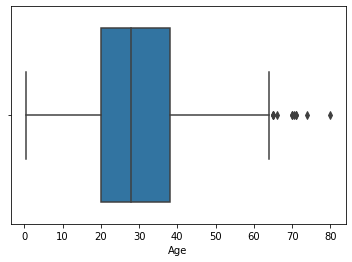

In [11]:
sns.boxplot(x=df["Age"])
plt.show()

In [14]:
# Using the inter-quartile range, we can determine the thresholds of a variable outliers

def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [16]:
# Determine the thresholds for outliers

outlier_thresholds(df, "Age")

(-6.6875, 64.8125)

In [17]:
# Determine the thresholds for outliers

outlier_thresholds(df, "Fare")

(-26.724, 65.6344)

In [18]:
# A function that determine if any of the variables have outliers

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [19]:
# Check if the variable have outliers

check_outlier(df, "Age")

True

In [20]:
# Check if the variable have outliers

check_outlier(df, "Fare")

True

## Finding column types

In [21]:
def grab_col_names(dataframe, cat_th=10, car_th=20):

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    
    return cat_cols, num_cols, cat_but_car

In [22]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4


In [23]:
num_cols = [col for col in num_cols if col not in "PassengerId"]

In [24]:
for col in num_cols:
    print(col, check_outlier(df, col))

Age True
Fare True


In [25]:
dff = load_application_train()
dff.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.500,24700.500,351000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019,-9461,-637,-3648.000,-2120,NaN,1,1,0,1.000,1.000,0.000,Laborers,1.000,2.000,2.000,WEDNESDAY,10.000,0.000,0.000,0.000,0.000,0.000,0.000,Business Entity Type 3,0.083,0.263,0.139,0.025,0.037,0.972,0.619,0.014,0.000,0.069,0.083,0.125,0.037,0.020,0.019,0.000,0.000,0.025,0.038,0.972,0.634,0.014,0.000,0.069,0.083,0.125,0.038,0.022,0.020,0.000,0.000,0.025,0.037,0.972,0.624,0.014,0.000,0.069,0.083,0.125,0.037,0.021,0.019,0.000,0.000,reg oper account,block of flats,0.015,"Stone, brick",No,2.000,2.000,2.000,2.000,-1134.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.500,35698.500,1129500.000,Family,State servant,Higher education,Married,House / apartment,0.004,-16765,-1188,-1186.000,-291,NaN,1,1,0,1.000,1.000,0.000,Core staff,2.000,1.000,1.000,MONDAY,11.000,0.000,0.000,0.000,0.000,0.000,0.000,School,0.311,0.622,NaN,0.096,0.053,0.985,0.796,0.060,0.080,0.035,0.292,0.333,0.013,0.077,0.055,0.004,0.010,0.092,0.054,0.985,0.804,0.050,0.081,0.035,0.292,0.333,0.013,0.079,0.055,0.000,0.000,0.097,0.053,0.985,0.799,0.061,0.080,0.035,0.292,0.333,0.013,0.079,0.056,0.004,0.010,reg oper account,block of flats,0.071,Block,No,1.000,0.000,1.000,0.000,-828.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.000,6750.000,135000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartm

In [26]:
cat_cols, num_cols, cat_but_car = grab_col_names(dff)

Observations: 161137
Variables: 122
cat_cols: 56
num_cols: 65
cat_but_car: 1
num_but_cat: 41


In [27]:
num_cols = [col for col in num_cols if col not in "SK_ID_CURR"]

In [28]:
for col in num_cols:
    print(col, check_outlier(dff, col))

CNT_CHILDREN True
AMT_INCOME_TOTAL True
AMT_CREDIT True
AMT_ANNUITY True
AMT_GOODS_PRICE True
REGION_POPULATION_RELATIVE True
DAYS_BIRTH False
DAYS_EMPLOYED True
DAYS_REGISTRATION True
DAYS_ID_PUBLISH False
OWN_CAR_AGE True
CNT_FAM_MEMBERS True
HOUR_APPR_PROCESS_START True
EXT_SOURCE_1 False
EXT_SOURCE_2 False
EXT_SOURCE_3 False
APARTMENTS_AVG True
BASEMENTAREA_AVG True
YEARS_BEGINEXPLUATATION_AVG True
YEARS_BUILD_AVG True
COMMONAREA_AVG True
ELEVATORS_AVG True
ENTRANCES_AVG True
FLOORSMAX_AVG True
FLOORSMIN_AVG True
LANDAREA_AVG True
LIVINGAPARTMENTS_AVG True
LIVINGAREA_AVG True
NONLIVINGAPARTMENTS_AVG True
NONLIVINGAREA_AVG True
APARTMENTS_MODE True
BASEMENTAREA_MODE True
YEARS_BEGINEXPLUATATION_MODE True
YEARS_BUILD_MODE True
COMMONAREA_MODE True
ELEVATORS_MODE True
ENTRANCES_MODE True
FLOORSMAX_MODE True
FLOORSMIN_MODE True
LANDAREA_MODE True
LIVINGAPARTMENTS_MODE True
LIVINGAREA_MODE True
NONLIVINGAPARTMENTS_MODE True
NONLIVINGAREA_MODE True
APARTMENTS_MEDI True
BASEMENTAREA_MEDI 

## Grabbing Outliers

In [29]:
def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe, col_name)
    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])
    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index

In [32]:
age_index = grab_outliers(df, "Age", True)

     PassengerId  Survived  Pclass                            Name   Sex    Age  SibSp  Parch      Ticket   Fare Cabin Embarked
33            34         0       2           Wheadon, Mr. Edward H  male 66.000      0      0  C.A. 24579 10.500   NaN        S
54            55         0       1  Ostby, Mr. Engelhart Cornelius  male 65.000      0      1      113509 61.979   B30        C
96            97         0       1       Goldschmidt, Mr. George B  male 71.000      0      0    PC 17754 34.654    A5        C
116          117         0       3            Connors, Mr. Patrick  male 70.500      0      0      370369  7.750   NaN        Q
280          281         0       3                Duane, Mr. Frank  male 65.000      0      0      336439  7.750   NaN        Q


In [34]:
outlier_thresholds(df, "Age")

(-6.6875, 64.8125)

In [35]:
check_outlier(df, "Age")

True

In [36]:
grab_outliers(df, "Age", True)

     PassengerId  Survived  Pclass                            Name   Sex    Age  SibSp  Parch      Ticket   Fare Cabin Embarked
33            34         0       2           Wheadon, Mr. Edward H  male 66.000      0      0  C.A. 24579 10.500   NaN        S
54            55         0       1  Ostby, Mr. Engelhart Cornelius  male 65.000      0      1      113509 61.979   B30        C
96            97         0       1       Goldschmidt, Mr. George B  male 71.000      0      0    PC 17754 34.654    A5        C
116          117         0       3            Connors, Mr. Patrick  male 70.500      0      0      370369  7.750   NaN        Q
280          281         0       3                Duane, Mr. Frank  male 65.000      0      0      336439  7.750   NaN        Q


Int64Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')

## Some ways to handle outliers

### Removing

In [40]:
# Remove observations from the dataset that exhibit outliers in one or more variables

def remove_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    df_without_outliers = dataframe[~((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))]
    return df_without_outliers

In [41]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4


In [42]:
num_cols = [col for col in num_cols if col not in "PassengerId"]

In [43]:
df.shape

(891, 12)

In [44]:
for col in num_cols:
    new_df = remove_outlier(df, col)

In [45]:
new_df.shape

(775, 12)

In [46]:
df.shape[0] - new_df.shape[0]

116

### Replacing

In [47]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [49]:
df = load()
cat_cols, num_cols, cat_but_car = grab_col_names(df)
num_cols = [col for col in num_cols if col not in "PassengerId"]

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4


In [50]:
df.shape

(891, 12)

In [51]:
for col in num_cols:
    print(col, check_outlier(df, col))

Age True
Fare True


In [52]:
for col in num_cols:
    replace_with_thresholds(df, col)

In [53]:
for col in num_cols:
    print(col, check_outlier(df, col))

Age False
Fare False


## Multivariate Outliers
***
**Multivariate Outliers:** These are a combination of unusual scores on at least two variables.
***


In [54]:
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include=['float64', 'int64'])
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.230,61.500,55.000,326,3.950,3.980,2.430
1,0.210,59.800,61.000,326,3.890,3.840,2.310
2,0.230,56.900,65.000,327,4.050,4.070,2.310
3,0.290,62.400,58.000,334,4.200,4.230,2.630
4,0.310,63.300,58.000,335,4.340,4.350,2.750


In [55]:
df.shape

(53940, 7)

In [56]:
for col in df.columns:
    print(col, check_outlier(df, col))

carat True
depth True
table True
price True
x True
y True
z True


In [58]:
low, up = outlier_thresholds(df, "carat")
df[((df["carat"] < low) | (df["carat"] > up))].shape

(1889, 7)

In [59]:
low, up = outlier_thresholds(df, "depth")
df[((df["depth"] < low) | (df["depth"] > up))].shape

(2545, 7)

In [60]:
clf = LocalOutlierFactor(n_neighbors=20)
clf.fit_predict(df) 

array([-1, -1, -1, ...,  1,  1,  1])

In [61]:
df_scores = clf.negative_outlier_factor_ 
df_scores[0:5]

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521])

In [62]:
np.sort(df_scores)[0:5]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092])

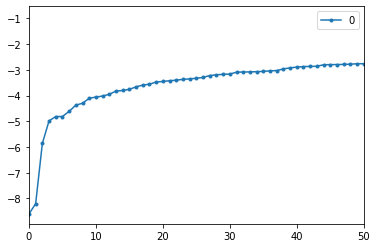

In [63]:
scores = pd.DataFrame(np.sort(df_scores))
scores.plot(stacked=True, xlim=[0, 50], style='.-')
plt.show()
th = np.sort(df_scores)[3]

In [64]:
df[df_scores < th]

,carat,depth,table,price,x,y,z
41918,1.030,78.200,54.000,1262,5.720,5.590,4.420
48410,0.510,61.800,54.700,1970,5.120,5.150,31.800
49189,0.510,61.800,55.000,2075,5.150,31.800,5.120


In [65]:
df[df_scores < th].shape

(3, 7)

In [66]:
df.describe([0.01, 0.05, 0.75, 0.90, 0.99]).T

,count,mean,std,min,1%,5%,50%,75%,90%,99%,max
carat,53940.000,0.798,0.474,0.200,0.240,0.300,0.700,1.040,1.510,2.180,5.010
depth,53940.000,61.749,1.433,43.000,57.900,59.300,61.800,62.500,63.300,65.600,79.000
table,53940.000,57.457,2.234,43.000,53.000,54.000,57.000,59.000,60.000,64.000,95.000
price,53940.000,3932.800,3989.440,326.000,429.000,544.000,2401.000,5324.250,9821.000,17378.220,18823.000
x,53940.000,5.731,1.122,0.000,4.020,4.290,5.700,6.540,7.310,8.360,10.740
y,53940.000,5.735,1.142,0.000,4.040,4.300,5.710,6.540,7.300,8.340,58.900
z,53940.000,3.539,0.706,0.000,2.480,2.650,3.530,4.040,4.520,5.150,31.800


In [67]:
df[df_scores < th].index

Int64Index([41918, 48410, 49189], dtype='int64')

In [68]:
df[df_scores < th].drop(axis=0, labels=df[df_scores < th].index)

,carat,depth,table,price,x,y,z


# Missing Values

In [69]:
df = load()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [74]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    if na_name:
        return na_columns

In [75]:
missing_values_table(df, True)

          n_miss  ratio
Cabin        687 77.100
Age          177 19.870
Embarked       2  0.220


['Age', 'Cabin', 'Embarked']

## Removing observations with missing data

In [76]:
df.dropna().shape

(183, 12)

## Performing mean or median imputation

In [77]:
df["Age"].fillna(df["Age"].mean()).isnull().sum()

0

In [78]:
df["Age"].fillna(df["Age"].median()).isnull().sum()

0

## Replacing missing values with an arbitrary number

In [79]:
df["Age"].fillna(0).isnull().sum()

0

## Performing imputation in categorical variable breakdown

In [82]:
df.groupby("Sex")["Age"].mean()

Sex
female   27.916
male     30.727
Name: Age, dtype: float64

In [83]:
df["Age"].mean()

29.69911764705882

In [84]:
df["Age"].fillna(df.groupby("Sex")["Age"].transform("mean")).isnull().sum()

0

In [85]:
df.groupby("Sex")["Age"].mean()["female"]

27.915708812260537

In [87]:
df.loc[(df["Age"].isnull()) & (df["Sex"]=="female"), "Age"] = df.groupby("Sex")["Age"].mean()["female"]
df.loc[(df["Age"].isnull()) & (df["Sex"]=="male"), "Age"] = df.groupby("Sex")["Age"].mean()["male"]

In [88]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Performing imputation with  predictive value

In [89]:
df = load()
cat_cols, num_cols, cat_but_car = grab_col_names(df)
num_cols = [col for col in num_cols if col not in "PassengerId"]
dff = pd.get_dummies(df[cat_cols + num_cols], drop_first=True)
dff.head()

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4


,Survived,Pclass,SibSp,Parch,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,1,0,22.000,7.250,1,0,1
1,1,1,1,0,38.000,71.283,0,0,0
2,1,3,0,0,26.000,7.925,0,0,1
3,1,1,1,0,35.000,53.100,0,0,1
4,0,3,0,0,35.000,8.050,1,0,1


In [90]:
scaler = MinMaxScaler()
dff = pd.DataFrame(scaler.fit_transform(dff), columns=dff.columns)
dff.head()

,Survived,Pclass,SibSp,Parch,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.000,1.000,0.125,0.000,0.271,0.014,1.000,0.000,1.000
1,1.000,0.000,0.125,0.000,0.472,0.139,0.000,0.000,0.000
2,1.000,1.000,0.000,0.000,0.321,0.015,0.000,0.000,1.000
3,1.000,0.000,0.125,0.000,0.435,0.104,0.000,0.000,1.000
4,0.000,1.000,0.000,0.000,0.435,0.016,1.000,0.000,1.000


In [91]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
dff = pd.DataFrame(imputer.fit_transform(dff), columns=dff.columns)
dff.head()

,Survived,Pclass,SibSp,Parch,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.000,1.000,0.125,0.000,0.271,0.014,1.000,0.000,1.000
1,1.000,0.000,0.125,0.000,0.472,0.139,0.000,0.000,0.000
2,1.000,1.000,0.000,0.000,0.321,0.015,0.000,0.000,1.000
3,1.000,0.000,0.125,0.000,0.435,0.104,0.000,0.000,1.000
4,0.000,1.000,0.000,0.000,0.435,0.016,1.000,0.000,1.000


In [93]:
dff = pd.DataFrame(scaler.inverse_transform(dff), columns=dff.columns)
df["age_imputed_knn"] = dff[["Age"]]

In [94]:
df.loc[df["Age"].isnull(), ["Age", "age_imputed_knn"]]

,Age,age_imputed_knn
5,NaN,3804.344
17,NaN,2992.628
19,NaN,971.296
26,NaN,2610.644
28,NaN,1401.028
29,NaN,1942.172
31,NaN,2355.988
32,NaN,1401.028
36,NaN,1735.264
42,NaN,2284.366


In [95]:
df.loc[df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_imputed_knn
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.458,NaN,Q,3804.344
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.000,NaN,S,2992.628
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.225,NaN,C,971.296
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.225,NaN,C,2610.644
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.879,NaN,Q,1401.028
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.896,NaN,S,1942.172
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.521,B78,C,2355.988
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.750,NaN,Q,1401.028
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.229,NaN,C,1735.264
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.896,NaN,C,2284.366


## Advanced Analysis


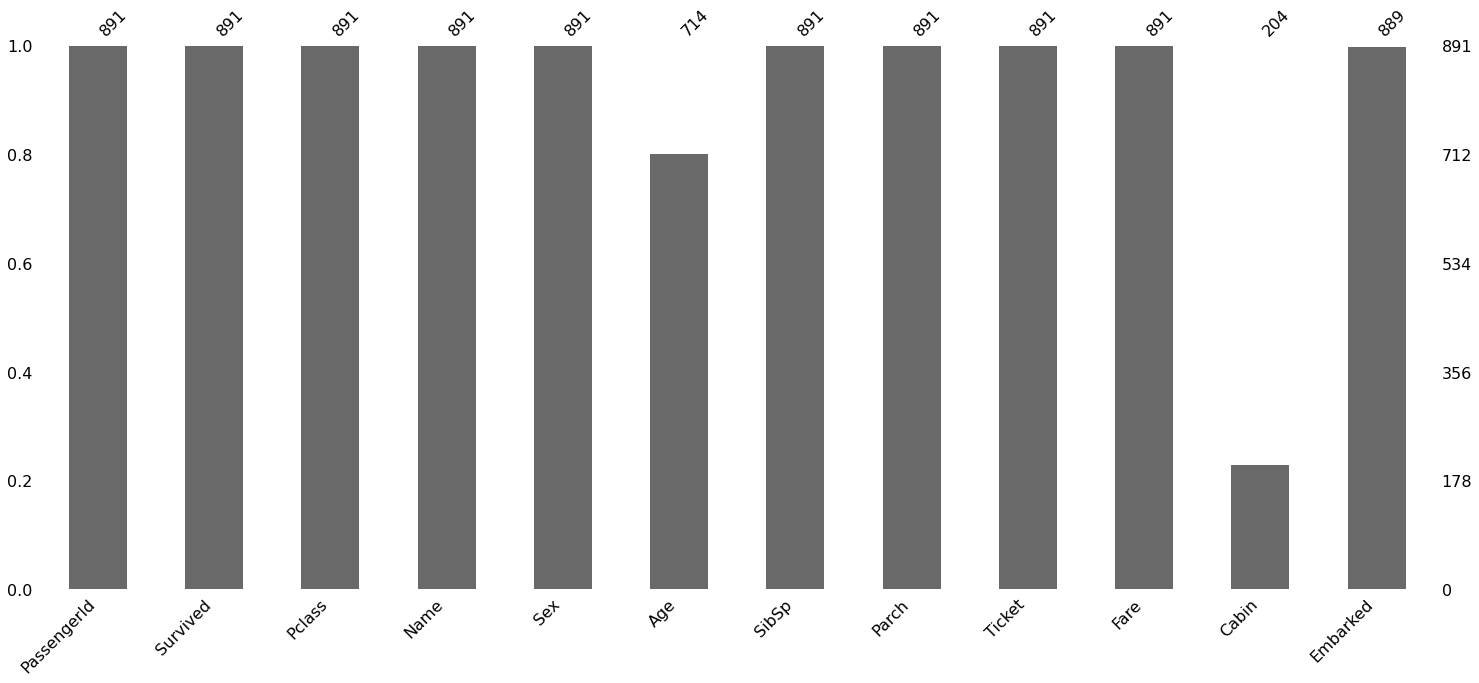

In [97]:
df = load()
msno.bar(df)
plt.show()

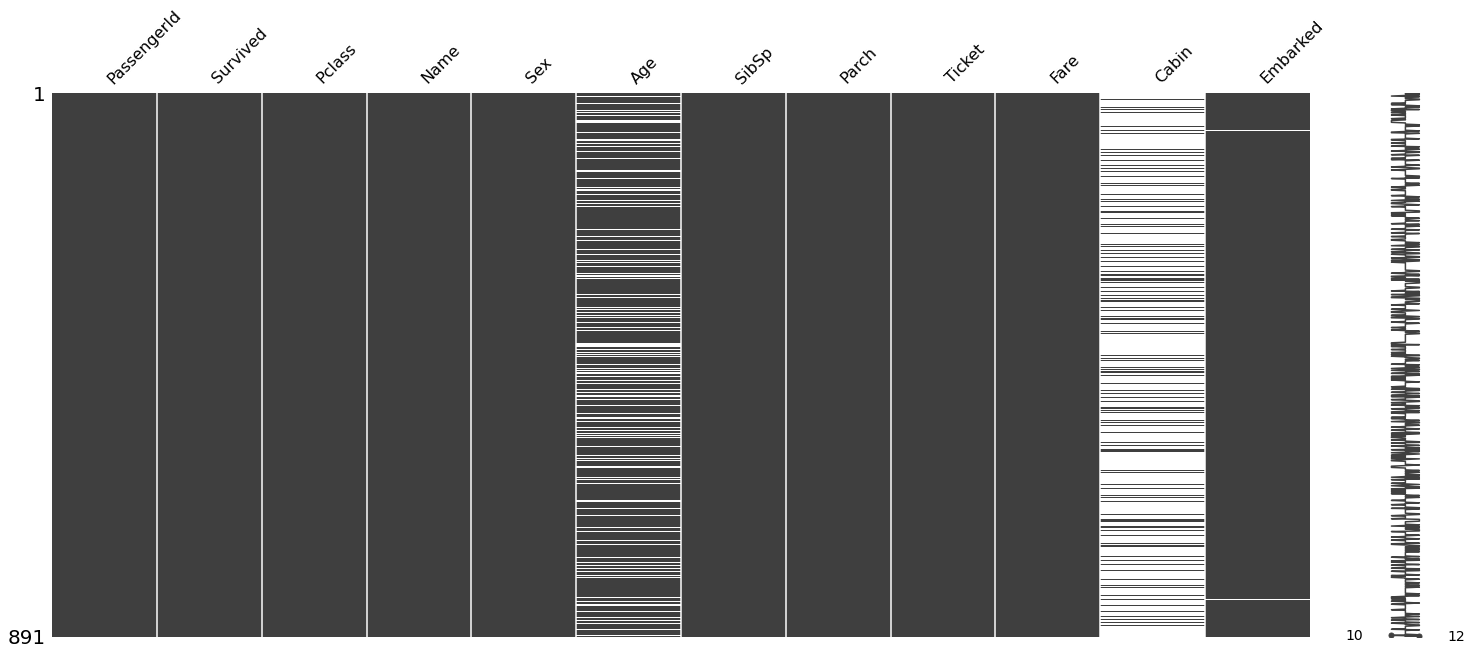

In [98]:
msno.matrix(df)
plt.show()

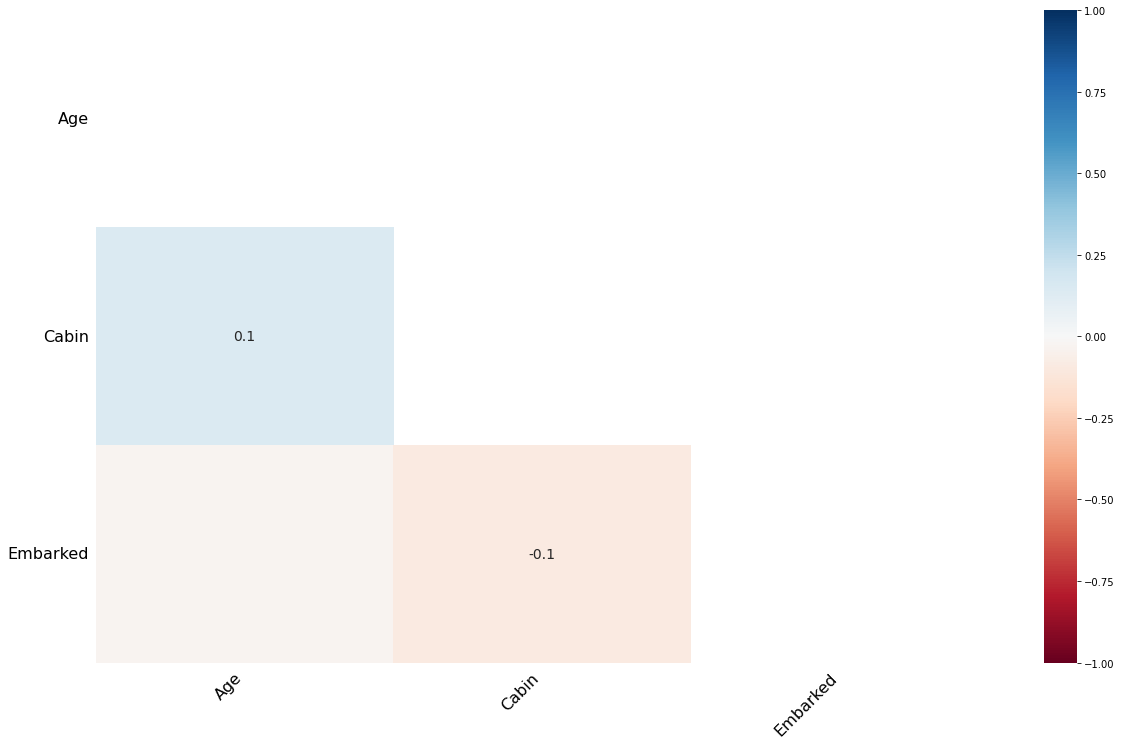

In [99]:
msno.heatmap(df)
plt.show()

In [101]:
na_cols = missing_values_table(df, True)

          n_miss  ratio
Cabin        687 77.100
Age          177 19.870
Embarked       2  0.220


In [102]:
def missing_vs_target(dataframe, target, na_columns):
    temp_df = dataframe.copy()
    for col in na_columns:
        temp_df[col + '_NA_FLAG'] = np.where(temp_df[col].isnull(), 1, 0)
    na_flags = temp_df.loc[:, temp_df.columns.str.contains("_NA_")].columns
    for col in na_flags:
        print(pd.DataFrame({"TARGET_MEAN": temp_df.groupby(col)[target].mean(),
                            "Count": temp_df.groupby(col)[target].count()}), end="\n\n\n")

In [103]:
missing_vs_target(df, "Survived", na_cols)

             TARGET_MEAN  Count
Age_NA_FLAG                    
0                  0.406    714
1                  0.294    177


               TARGET_MEAN  Count
Cabin_NA_FLAG                    
0                    0.667    204
1                    0.300    687


                  TARGET_MEAN  Count
Embarked_NA_FLAG                    
0                       0.382    889
1                       1.000      2




# Encoding

## Label Encoding & Binary Encoding

In [104]:
df = load()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [105]:
df["Sex"].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [106]:
le = LabelEncoder() 
le.fit_transform(df["Sex"])[0:5] 

array([1, 0, 0, 0, 1])

In [107]:
le.inverse_transform([0, 1])

array(['female', 'male'], dtype=object)

In [108]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [111]:
df = load()
binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
               and df[col].nunique() == 2]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [112]:
for col in binary_cols:
    label_encoder(df, col)

In [113]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.000,0,0,373450,8.050,NaN,S


In [115]:
df = load_application_train()
binary_cols = [col for col in df.columns if df[col].dtype not in ["int64", "float64"] and df[col].nunique() == 2]
df[binary_cols].head()

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,EMERGENCYSTATE_MODE
0,Cash loans,N,Y,No
1,Cash loans,N,N,No
2,Revolving loans,Y,Y,NaN
3,Cash loans,N,Y,NaN
4,Cash loans,N,Y,NaN


In [116]:
for col in binary_cols:
    label_encoder(df, col)

In [117]:
df[binary_cols].head()

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,EMERGENCYSTATE_MODE
0,0,0,1,0
1,0,0,0,0
2,1,1,1,2
3,0,0,1,2
4,0,0,1,2


## One-Hot Encoding

In [125]:
df = load()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [119]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [126]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [127]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4


In [128]:
one_hot_encoder(df, ohe_cols).head()

,PassengerId,Survived,Name,Sex,Age,Ticket,Fare,Cabin,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",male,22.000,A/5 21171,7.250,NaN,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,PC 17599,71.283,C85,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",female,26.000,STON/O2. 3101282,7.925,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,113803,53.100,C123,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",male,35.000,373450,8.050,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [129]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


## Rare Encoding

In [130]:
df = load_application_train()
df["NAME_EDUCATION_TYPE"].value_counts()

Secondary / secondary special    114539
Higher education                  39243
Incomplete higher                  5296
Lower secondary                    1973
Academic degree                      86
Name: NAME_EDUCATION_TYPE, dtype: int64

In [131]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 161137
Variables: 122
cat_cols: 56
num_cols: 65
cat_but_car: 1
num_but_cat: 41


In [132]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

In [133]:
for col in cat_cols:
    cat_summary(df, col)

                 NAME_CONTRACT_TYPE  Ratio
Cash loans                   145811 90.489
Revolving loans               15326  9.511
##########################################
     CODE_GENDER  Ratio
F         106062 65.821
M          55072 34.177
XNA            3  0.002
##########################################
   FLAG_OWN_CAR  Ratio
N        106402 66.032
Y         54735 33.968
##########################################
   FLAG_OWN_REALTY  Ratio
Y           111695 69.317
N            49442 30.683
##########################################
                 NAME_TYPE_SUITE  Ratio
Unaccompanied             130218 80.812
Family                     21092 13.089
Spouse, partner             5977  3.709
Children                    1696  1.053
Other_B                      899  0.558
Other_A                      449  0.279
Group of people              147  0.091
##########################################
                      NAME_INCOME_TYPE  Ratio
Working                          83418 51.768
C

In [134]:
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")

In [135]:
rare_analyser(df, "TARGET", cat_cols)

NAME_CONTRACT_TYPE : 2
                  COUNT  RATIO  TARGET_MEAN
Cash loans       145811  0.905        0.084
Revolving loans   15326  0.095        0.055


CODE_GENDER : 3
      COUNT  RATIO  TARGET_MEAN
F    106062  0.658        0.071
M     55072  0.342        0.102
XNA       3  0.000        0.000


FLAG_OWN_CAR : 2
    COUNT  RATIO  TARGET_MEAN
N  106402  0.660        0.086
Y   54735  0.340        0.073


FLAG_OWN_REALTY : 2
    COUNT  RATIO  TARGET_MEAN
N   49442  0.307        0.084
Y  111695  0.693        0.080


NAME_TYPE_SUITE : 7
                  COUNT  RATIO  TARGET_MEAN
Children           1696  0.011        0.075
Family            21092  0.131        0.078
Group of people     147  0.001        0.054
Other_A             449  0.003        0.096
Other_B             899  0.006        0.091
Spouse, partner    5977  0.037        0.078
Unaccompanied    130218  0.808        0.082


NAME_INCOME_TYPE : 8
                      COUNT  RATIO  TARGET_MEAN
Businessman               6  0.00

In [136]:
def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()
    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O'
                    and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]
    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])
    return temp_df

In [137]:
new_df = rare_encoder(df, 0.01)
rare_analyser(new_df, "TARGET", cat_cols)

NAME_CONTRACT_TYPE : 2
                  COUNT  RATIO  TARGET_MEAN
Cash loans       145811  0.905        0.084
Revolving loans   15326  0.095        0.055


CODE_GENDER : 3
       COUNT  RATIO  TARGET_MEAN
F     106062  0.658        0.071
M      55072  0.342        0.102
Rare       3  0.000        0.000


FLAG_OWN_CAR : 2
    COUNT  RATIO  TARGET_MEAN
N  106402  0.660        0.086
Y   54735  0.340        0.073


FLAG_OWN_REALTY : 2
    COUNT  RATIO  TARGET_MEAN
N   49442  0.307        0.084
Y  111695  0.693        0.080


NAME_TYPE_SUITE : 5
                  COUNT  RATIO  TARGET_MEAN
Children           1696  0.011        0.075
Family            21092  0.131        0.078
Rare               1495  0.009        0.089
Spouse, partner    5977  0.037        0.078
Unaccompanied    130218  0.808        0.082


NAME_INCOME_TYPE : 5
                      COUNT  RATIO  TARGET_MEAN
Commercial associate  37502  0.233        0.075
Pensioner             28887  0.179        0.055
Rare                 

In [138]:
df["OCCUPATION_TYPE"].value_counts()

Laborers                 29006
Sales staff              16664
Core staff               14476
Managers                 11177
Drivers                   9690
High skill tech staff     5912
Accountants               5204
Medicine staff            4565
Security staff            3547
Cooking staff             3124
Cleaning staff            2416
Private service staff     1396
Low-skill Laborers        1087
Waiters/barmen staff       706
Secretaries                680
Realty agents              385
HR staff                   303
IT staff                   266
Name: OCCUPATION_TYPE, dtype: int64

## Feature Scaling

### StandardScaler

In [139]:
df = load()
ss = StandardScaler()
df["Age_standard_scaler"] = ss.fit_transform(df[["Age"]])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_standard_scaler
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,-0.530
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,0.572
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,-0.255
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,0.365
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,0.365


### Robust Scaler

In [140]:
rs = RobustScaler()
df["Age_robuts_scaler"] = rs.fit_transform(df[["Age"]])
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.000,446.000,257.354,1.000,223.500,446.000,668.500,891.000
Survived,891.000,0.384,0.487,0.000,0.000,0.000,1.000,1.000
Pclass,891.000,2.309,0.836,1.000,2.000,3.000,3.000,3.000
Age,714.000,29.699,14.526,0.420,20.125,28.000,38.000,80.000
SibSp,891.000,0.523,1.103,0.000,0.000,0.000,1.000,8.000
Parch,891.000,0.382,0.806,0.000,0.000,0.000,0.000,6.000
Fare,891.000,32.204,49.693,0.000,7.910,14.454,31.000,512.329
Age_standard_scaler,714.000,0.000,1.001,-2.017,-0.660,-0.117,0.572,3.465
Age_robuts_scaler,714.000,0.095,0.813,-1.543,-0.441,0.000,0.559,2.909


### Min-Max Scaler

In [141]:
mms = MinMaxScaler()
df["Age_min_max_scaler"] = mms.fit_transform(df[["Age"]])
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.000,446.000,257.354,1.000,223.500,446.000,668.500,891.000
Survived,891.000,0.384,0.487,0.000,0.000,0.000,1.000,1.000
Pclass,891.000,2.309,0.836,1.000,2.000,3.000,3.000,3.000
Age,714.000,29.699,14.526,0.420,20.125,28.000,38.000,80.000
SibSp,891.000,0.523,1.103,0.000,0.000,0.000,1.000,8.000
Parch,891.000,0.382,0.806,0.000,0.000,0.000,0.000,6.000
Fare,891.000,32.204,49.693,0.000,7.910,14.454,31.000,512.329
Age_standard_scaler,714.000,0.000,1.001,-2.017,-0.660,-0.117,0.572,3.465
Age_robuts_scaler,714.000,0.095,0.813,-1.543,-0.441,0.000,0.559,2.909
Age_min_max_scaler,714.000,0.368,0.183,0.000,0.248,0.347,0.472,1.000


In [142]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_standard_scaler,Age_robuts_scaler,Age_min_max_scaler
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,-0.530,-0.336,0.271
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,0.572,0.559,0.472
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,-0.255,-0.112,0.321
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,0.365,0.392,0.435
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,0.365,0.392,0.435


In [143]:
age_cols = [col for col in df.columns if "Age" in col]

In [144]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)
    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

count   714.000
mean     29.699
std      14.526
min       0.420
5%        4.000
10%      14.000
20%      19.000
30%      22.000
40%      25.000
50%      28.000
60%      31.800
70%      36.000
80%      41.000
90%      50.000
95%      56.000
99%      65.870
max      80.000
Name: Age, dtype: float64


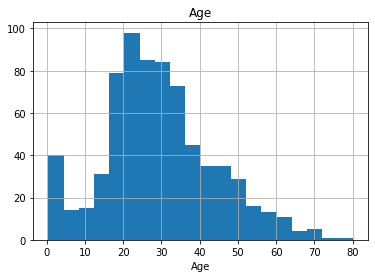

count   714.000
mean      0.000
std       1.001
min      -2.017
5%       -1.770
10%      -1.081
20%      -0.737
30%      -0.530
40%      -0.324
50%      -0.117
60%       0.145
70%       0.434
80%       0.778
90%       1.398
95%       1.812
99%       2.492
max       3.465
Name: Age_standard_scaler, dtype: float64


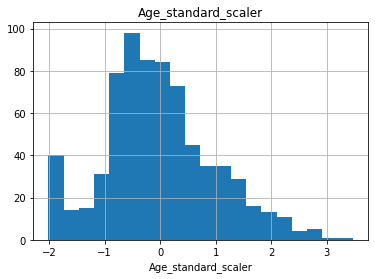

count   714.000
mean      0.095
std       0.813
min      -1.543
5%       -1.343
10%      -0.783
20%      -0.503
30%      -0.336
40%      -0.168
50%       0.000
60%       0.213
70%       0.448
80%       0.727
90%       1.231
95%       1.566
99%       2.119
max       2.909
Name: Age_robuts_scaler, dtype: float64


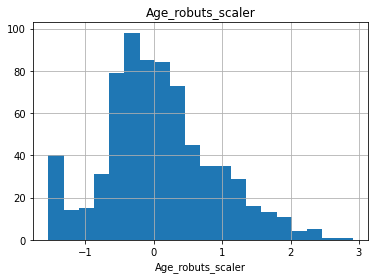

count   714.000
mean      0.368
std       0.183
min       0.000
5%        0.045
10%       0.171
20%       0.233
30%       0.271
40%       0.309
50%       0.347
60%       0.394
70%       0.447
80%       0.510
90%       0.623
95%       0.698
99%       0.822
max       1.000
Name: Age_min_max_scaler, dtype: float64


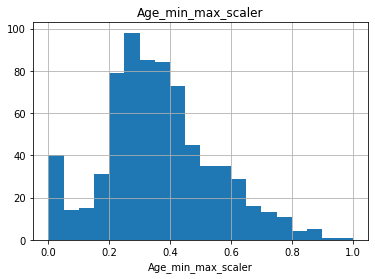

In [145]:
for col in age_cols:
    num_summary(df, col, plot=True)

## Numeric to Categorical Binning

In [146]:
df["Age_qcut"] = pd.qcut(df['Age'], 5)

# Feature Extraction

## Binary Features

In [147]:
df = load()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [148]:
df["NEW_CABIN_BOOL"] = df["Cabin"].notnull().astype('int')

In [149]:
df.groupby("NEW_CABIN_BOOL").agg({"Survived": "mean"})

,Survived
NEW_CABIN_BOOL,
0,0.300
1,0.667


In [150]:
from statsmodels.stats.proportion import proportions_ztest

In [151]:
test_stat, pvalue = proportions_ztest(count=[df.loc[df["NEW_CABIN_BOOL"] == 1, "Survived"].sum(),
                                             df.loc[df["NEW_CABIN_BOOL"] == 0, "Survived"].sum()],
                                      nobs=[df.loc[df["NEW_CABIN_BOOL"] == 1, "Survived"].shape[0],
                                            df.loc[df["NEW_CABIN_BOOL"] == 0, "Survived"].shape[0]])

In [152]:
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 9.4597, p-value = 0.0000


In [153]:
df.loc[((df['SibSp'] + df['Parch']) > 0), "NEW_IS_ALONE"] = "NO"
df.loc[((df['SibSp'] + df['Parch']) == 0), "NEW_IS_ALONE"] = "YES"

In [154]:
df.groupby("NEW_IS_ALONE").agg({"Survived": "mean"})

,Survived
NEW_IS_ALONE,
NO,0.506
YES,0.304


In [155]:
test_stat, pvalue = proportions_ztest(count=[df.loc[df["NEW_IS_ALONE"] == "YES", "Survived"].sum(),
                                             df.loc[df["NEW_IS_ALONE"] == "NO", "Survived"].sum()],
                                      nobs=[df.loc[df["NEW_IS_ALONE"] == "YES", "Survived"].shape[0],
                                            df.loc[df["NEW_IS_ALONE"] == "NO", "Survived"].shape[0]])

In [156]:
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = -6.0704, p-value = 0.0000


## Text Features

In [157]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NEW_CABIN_BOOL,NEW_IS_ALONE
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,0,NO
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,1,NO
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,0,YES
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,1,NO
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,0,YES


In [158]:
# Letter count
df["NEW_NAME_COUNT"] = df["Name"].str.len()

In [159]:
# Word count
df["NEW_NAME_WORD_COUNT"] = df["Name"].apply(lambda x: len(str(x).split(" ")))

In [160]:
# Finding special cases
df["NEW_NAME_DR"] = df["Name"].apply(lambda x: len([x for x in x.split() if x.startswith("Dr")]))

In [161]:
df.groupby("NEW_NAME_DR").agg({"Survived": ["mean","count"]})

Survived      
                mean count
NEW_NAME_DR               
0              0.383   881
1              0.500    10

## Regex Features

In [162]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NEW_CABIN_BOOL,NEW_IS_ALONE,NEW_NAME_COUNT,NEW_NAME_WORD_COUNT,NEW_NAME_DR
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,0,NO,23,4,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,1,NO,51,7,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,0,YES,22,3,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,1,NO,44,7,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,0,YES,24,4,0


In [163]:
df['NEW_TITLE'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [164]:
df[["NEW_TITLE", "Survived", "Age"]].groupby(["NEW_TITLE"]).agg({"Survived": "mean", "Age": ["count", "mean"]})

Survived   Age       
              mean count   mean
NEW_TITLE                      
Capt         0.000     1 70.000
Col          0.500     2 58.000
Countess     1.000     1 33.000
Don          0.000     1 40.000
Dr           0.429     6 42.000
Jonkheer     0.000     1 38.000
Lady         1.000     1 48.000
Major        0.500     2 48.500
Master       0.575    36  4.574
Miss         0.698   146 21.774
Mlle         1.000     2 24.000
Mme          1.000     1 24.000
Mr           0.157   398 32.368
Mrs          0.792   108 35.898
Ms           1.000     1 28.000
Rev          0.000     6 43.167
Sir          1.000     1 49.000

## Date Features

In [166]:
dff = pd.read_csv("/content/my_data/course_reviews.csv")
dff.head()

,Rating,Timestamp,Enrolled,Progress,Questions Asked,Questions Answered
0,5.000,2021-02-05 07:45:55,2021-01-25 15:12:08,5.000,0.000,0.000
1,5.000,2021-02-04 21:05:32,2021-02-04 20:43:40,1.000,0.000,0.000
2,4.500,2021-02-04 20:34:03,2019-07-04 23:23:27,1.000,0.000,0.000
3,5.000,2021-02-04 16:56:28,2021-02-04 14:41:29,10.000,0.000,0.000
4,4.000,2021-02-04 15:00:24,2020-10-13 03:10:07,10.000,0.000,0.000


In [167]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4323 entries, 0 to 4322
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rating              4323 non-null   float64
 1   Timestamp           4323 non-null   object 
 2   Enrolled            4323 non-null   object 
 3   Progress            4323 non-null   float64
 4   Questions Asked     4323 non-null   float64
 5   Questions Answered  4323 non-null   float64
dtypes: float64(4), object(2)
memory usage: 202.8+ KB


In [168]:
dff['Timestamp'] = pd.to_datetime(dff["Timestamp"], format="%Y-%m-%d")

In [169]:
# Year
dff['year'] = dff['Timestamp'].dt.year

In [170]:
# Month
dff['month'] = dff['Timestamp'].dt.month

In [171]:
# Year difference
dff['year_diff'] = date.today().year - dff['Timestamp'].dt.year

In [172]:
# Month difference
dff['month_diff'] = (date.today().year - dff['Timestamp'].dt.year) * 12 + date.today().month - dff['Timestamp'].dt.month

In [173]:
# Day name
dff['day_name'] = dff['Timestamp'].dt.day_name()

In [174]:
dff.head()

,Rating,Timestamp,Enrolled,Progress,Questions Asked,Questions Answered,year,month,year_diff,month_diff,day_name
0,5.000,2021-02-05 07:45:55,2021-01-25 15:12:08,5.000,0.000,0.000,2021,2,1,21,Friday
1,5.000,2021-02-04 21:05:32,2021-02-04 20:43:40,1.000,0.000,0.000,2021,2,1,21,Thursday
2,4.500,2021-02-04 20:34:03,2019-07-04 23:23:27,1.000,0.000,0.000,2021,2,1,21,Thursday
3,5.000,2021-02-04 16:56:28,2021-02-04 14:41:29,10.000,0.000,0.000,2021,2,1,21,Thursday
4,4.000,2021-02-04 15:00:24,2020-10-13 03:10:07,10.000,0.000,0.000,2021,2,1,21,Thursday


## Feature Interaction

In [175]:
df = load()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [176]:
df["NEW_AGE_PCLASS"] = df["Age"] * df["Pclass"]
df["NEW_FAMILY_SIZE"] = df["SibSp"] + df["Parch"] + 1

In [177]:
df.loc[(df['Sex'] == 'male') & (df['Age'] <= 21), 'NEW_SEX_CAT'] = 'youngmale'
df.loc[(df['Sex'] == 'male') & (df['Age'] > 21) & (df['Age'] < 50), 'NEW_SEX_CAT'] = 'maturemale'
df.loc[(df['Sex'] == 'male') & (df['Age'] >= 50), 'NEW_SEX_CAT'] = 'seniormale'
df.loc[(df['Sex'] == 'female') & (df['Age'] <= 21), 'NEW_SEX_CAT'] = 'youngfemale'
df.loc[(df['Sex'] == 'female') & (df['Age'] > 21) & (df['Age'] < 50), 'NEW_SEX_CAT'] = 'maturefemale'
df.loc[(df['Sex'] == 'female') & (df['Age'] >= 50), 'NEW_SEX_CAT'] = 'seniorfemale'

In [178]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NEW_AGE_PCLASS,NEW_FAMILY_SIZE,NEW_SEX_CAT
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,66.000,2,maturemale
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,38.000,2,maturefemale
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,78.000,1,maturefemale
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,35.000,2,maturefemale
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,105.000,1,maturemale


In [179]:
df.groupby("NEW_SEX_CAT")["Survived"].mean()

NEW_SEX_CAT
maturefemale   0.774
maturemale     0.199
seniorfemale   0.909
seniormale     0.135
youngfemale    0.679
youngmale      0.250
Name: Survived, dtype: float64